<a href="https://colab.research.google.com/github/nafizahamed8/Deep-Learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***FeedForward Propogation***

In [ ]:
import numpy as np
def feed_forward(inputs,outputs,weights):
  pre_hidden=np.dot(inputs,weights[0]+weights[1])
  hidden=1/(1+np.exp(-pre_hidden))#applying sigmoid value in hidden layer
  pred_out=np.dot(hidden,weights[2]+weights[3])
  mean_squared_error=np.mean(np.square(pred_out-outputs))
  return mean_squared_error

#***Activation Function in Code***

In [ ]:
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def relu(x):
  return np.where(x>0,x,0)
def linear(x):
  return x
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

#***loss function in code***

In [ ]:
def mse(p,y):
  return np.mean(np.square(p-y))

def mae(p,y):
  return np.mean(np.square(np.abs(p-y)))

def binary_cross_entropy(p,y):
  return -np.mean(y*np.log(p)+(1-y)*np.log(1-p))

def categorical_cross_entropy(p,y):
  return -np.mean(np.log(p[np.arange(len(y)),y]))

#***gradient descent in code***

In [ ]:
from copy import deepcopy
def feed_forward(inputs,outputs,weights):
  pre_hidden=np.dot(inputs,weights[0]+weights[1])
  hidden=1/(1+np.exp(-pre_hidden))#applying sigmoid value in hidden layer
  pred_out=np.dot(hidden,weights[2]+weights[3])
  mean_squared_error=np.mean(np.square(pred_out-outputs))
  return mean_squared_error

def update_weights(inputs,outputs,weights,lr):
  original_weights=deepcopy(weights)
  temp_weights=deepcopy(weights)
  updated_weights=deepcopy(weights)
  original_loss=feed_forward(inputs,outputs,weights)
  for i,layer in enumerate(original_weights):
    for index,weight in np.ndenumerate(layer):
      temp_weights=deepcopy(weights)
      temp_weights[i][index]+=0.0001
      loss_plus=feed_forward(inputs,outputs,temp_weights)
      grad=(loss_plus-original_loss)/0.0001
      updated_weights[i][index]-=grad*lr
  return updated_weights,original_loss


In [ ]:
from copy import deepcopy
import numpy as np
x=np.array([[1,1]])
y=np.array([[0]])

In [ ]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

In [ ]:
losses=[]
for epoch in range(100):
  W,loss=update_weights(x,y,W,0.1)
  losses.append(loss)

Text(0.5, 1.0, 'Loss over increasing number of epochs')

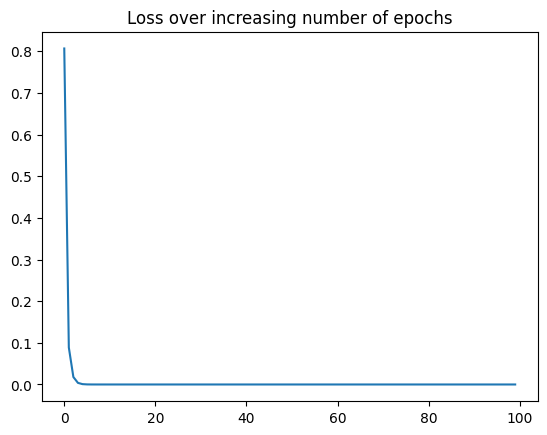

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [ ]:
W

[array([[-0.02125817, -0.62265784, -0.30834132],
        [ 0.36334342, -0.5610578 ,  0.15354644]], dtype=float32),
 array([-0.04591845,  0.47938803, -0.13489884], dtype=float32),
 array([[ 0.31969866],
        [-0.0340087 ],
        [ 0.01129413]], dtype=float32),
 array([-0.12069324], dtype=float32)]

In [ ]:
pre_hidden=np.dot(x,W[0])+W[1]
hidden=1/(1+np.exp(-pre_hidden))
pred_out=np.dot(hidden,W[2]+W[3])

In [ ]:
pred_out

array([[0.01611552]])

#***Impact of the learning rate***

In [ ]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

In [ ]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [ ]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [ ]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

In [ ]:
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])


Text(0, 0.5, 'Weight value')

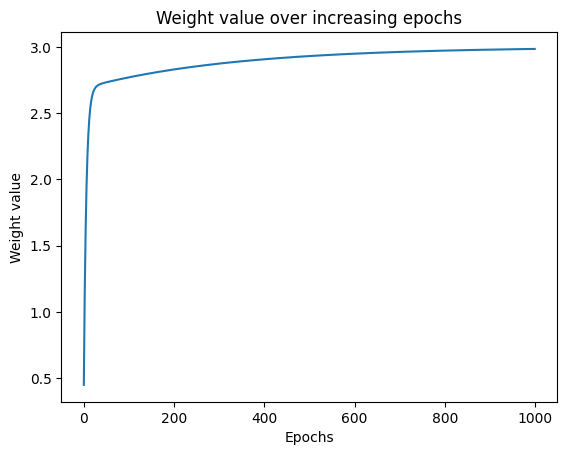

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

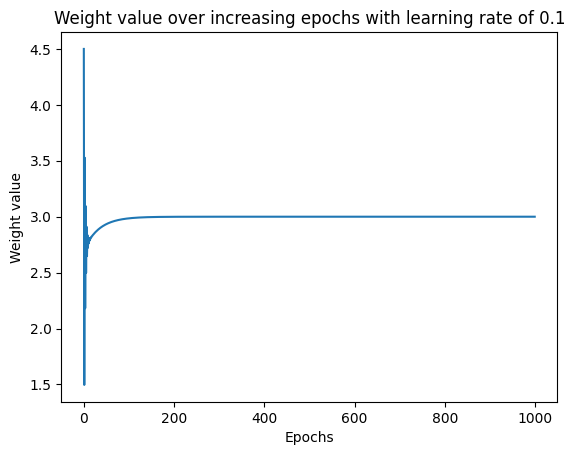

In [ ]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')